<a href="https://colab.research.google.com/github/BDZG10/IntArt.FIME/blob/main/AF5_Procesamiento_De_Conjunto_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cargar el dataset con pandas

In [ ]:
# Actividad 5: Procesamiento de conjuntos de datos en Python
# Equipo:
# N4 Cesar Ballin Rodriguez-2132117
# N4 Brandon Daniel Zavala Gaytan 2055952
# N4 Dylan Jesús Cuéllar Aranda 2042806
# N4 Letizia Isabel García Vargas 2056273
# N5 Erick Escárcega Esparza 2132268
import matplotlib.pyplot as plt # Generar gráficos
import numpy as np # Generar arreglos
import pandas as pd # Cargar datasets
from google.colab import drive
drive.mount('/content/drive')
dataset = "/content/drive/MyDrive/Colab Notebooks/robot_sensors.csv"
sensores = pd.read_csv(dataset)  # Carga el dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Mostrar primeras filas del dataset

In [ ]:
print('Mostrar las primeras filas del dataset')
sensores.head(5)

Mostrar las primeras filas del dataset


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246


3. Limpiar los datos

In [ ]:
print(sensores.shape)
print(sensores.isnull().sum())
datos_limpios = sensores.dropna()  # Elimina todas las filas con al menos un valor nulo
display(f"Se eliminaron {len(sensores) - len(datos_limpios)} filas con valores nulos")
datos_limpios = datos_limpios[datos_limpios['Velocidad (cm/s)'] >= 0] #Distancia positiva
datos_limpios = datos_limpios[datos_limpios['Distancia (cm)'] >= 0] #Distancia positiva
datos_limpios = datos_limpios[datos_limpios['Distancia (cm)'] <=100] #Distancia máxima de 100 cm
datos_limpios = datos_limpios[datos_limpios['Temperatura (°C)'].between(-20, 40)] #Rango de Temperatura

(1000, 4)
Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


'Se eliminaron 87 filas con valores nulos'

4. Normalizar los datos numéricos con Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columnas = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']
scaler = MinMaxScaler()
datos_normalizados = datos_limpios.copy()
datos_normalizados[columnas] = scaler.fit_transform(datos_limpios[columnas])
print('Primeras 5 filas de los datos normalizados:')
display(datos_normalizados.head())

Primeras 5 filas de los datos normalizados:


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,0.371735,0.182609,0.262269
1,1,0.950755,0.540740,0.247509
2,2,0.730954,0.873049,0.908233
3,3,0.596960,0.731791,0.250082
4,4,0.152134,0.806411,0.272535


5. Visualizar los datos normalizados usando matplotlib

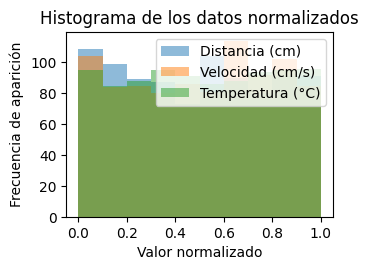

Estadísticas descriptivas de los datos normalizados:


,Distancia (cm),Velocidad (cm/s),Temperatura (°C)
count,913.000000,913.000000,913.000000
mean,0.487539,0.505184,0.503690
std,0.295048,0.293581,0.292465
min,0.000000,0.000000,0.000000
25%,0.225273,0.238892,0.260847
50%,0.499338,0.518528,0.504177
75%,0.739772,0.760704,0.762667
max,1.000000,1.000000,1.000000


In [ ]:
plt.subplot(2, 2, 4)
for col in columnas:
  plt.hist(datos_normalizados[col], alpha=0.5, label=col)
plt.title('Histograma de los datos normalizados')
plt.xlabel('Valor normalizado')
plt.ylabel('Frecuencia de aparición')
plt.legend()
plt.tight_layout()
plt.show()
print('Estadísticas descriptivas de los datos normalizados:')
display(datos_normalizados[columnas].describe())